In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from IPython.display import Image
import os

In [2]:
url_train_0='C:\\Users\\saf167687\\Desktop\\Python_Learning\\Machine Learning Python\\98-Training\\archive\\Sign-Language-Digits-Datase\\train\\A0\\'

In [3]:
url_train_1='C:\\Users\\saf167687\\Desktop\\Python_Learning\\Machine Learning Python\\98-Training\\archive\\Sign-Language-Digits-Datase\\train\\A1\\'

In [4]:
url_val_0='C:\\Users\\saf167687\\Desktop\\Python_Learning\\Machine Learning Python\\98-Training\\archive\\Sign-Language-Digits-Datase\\valid\\A0\\'

In [5]:
url_val_1='C:\\Users\\saf167687\\Desktop\\Python_Learning\\Machine Learning Python\\98-Training\\archive\\Sign-Language-Digits-Datase\\valid\\A1\\'

In [6]:
train=[url_train_0+ url for url in os.listdir(url_train_0)]+[url_train_1+ url for url in os.listdir(url_train_1)]
valid=[url_val_0+ url for url in os.listdir(url_val_0)]+[url_val_1+ url for url in os.listdir(url_val_1)]

In [29]:
X_train=np.array([(imread(images)/255).astype('float32') for images in train])

X_val=np.array([(imread(images)/255).astype('float32') for images in valid])

In [33]:
X_train[:2]

array([[[[0.7058824 , 0.7058824 , 0.7058824 ],
         [0.70980394, 0.70980394, 0.70980394],
         [0.7176471 , 0.7176471 , 0.7176471 ],
         ...,
         [0.67058825, 0.65882355, 0.6392157 ],
         [0.6666667 , 0.654902  , 0.61960787],
         [0.6627451 , 0.654902  , 0.6039216 ]],

        [[0.7058824 , 0.7058824 , 0.7058824 ],
         [0.7137255 , 0.7137255 , 0.7137255 ],
         [0.7176471 , 0.7176471 , 0.7176471 ],
         ...,
         [0.6901961 , 0.6745098 , 0.67058825],
         [0.6745098 , 0.6627451 , 0.6431373 ],
         [0.6666667 , 0.654902  , 0.61960787]],

        [[0.7058824 , 0.7058824 , 0.7058824 ],
         [0.7137255 , 0.7137255 , 0.7137255 ],
         [0.7176471 , 0.7176471 , 0.7176471 ],
         ...,
         [0.6901961 , 0.6862745 , 0.67058825],
         [0.6784314 , 0.6666667 , 0.6392157 ],
         [0.6627451 , 0.6509804 , 0.6156863 ]],

        ...,

        [[0.61960787, 0.6039216 , 0.60784316],
         [0.62352943, 0.60784316, 0.6117647 ]

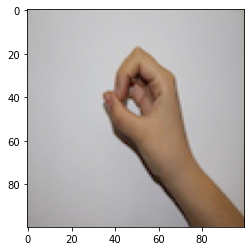

In [17]:
plt.imshow(X_train[0])

In [46]:
from tensorflow.keras.utils import to_categorical

In [59]:
y_train=[0]*170+[1]*171
y_train=np.array(y_train)

In [60]:
y_train=to_categorical(y_train,2)

In [61]:
y_train.shape

(341, 2)

In [62]:
y_val=[0]*30+[1]*30
y_val=np.array(y_val)

In [63]:
y_val=to_categorical(y_val,2)

In [64]:
y_val.shape

(60, 2)

In [65]:
len(y_train)

341

In [66]:
X_train=tf.constant(X_train)
X_val=tf.constant(X_val)

y_train=tf.constant(y_train)
y_val=tf.constant(y_val)

In [67]:
len(X_train),len(y_train), len(X_val), len(y_val)

(341, 341, 60, 60)

In [68]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

(TensorShape([341, 100, 100, 3]),
 TensorShape([341, 2]),
 TensorShape([60, 100, 100, 3]),
 TensorShape([60, 2]))

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [70]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=100, kernel_size=(4,4),input_shape=(100, 100, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 100 by 100 to 10000 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(2, activation='sigmoid'))

# https://keras.io/metrics/
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 97, 97, 100)       4900      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 100)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 230400)            0         
                                                                 
 dense (Dense)               (None, 128)               29491328  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 29,496,486
Trainable params: 29,496,486
Non-trainable params: 0
____________________________________________

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [74]:
model.fit(X_train,y_train,epochs=40,validation_data=(X_val,y_val),callbacks=[early_stop])

Epoch 1/40
11/11 [==============================] - 7s 543ms/step - loss: 2.6355 - accuracy: 0.5982 - val_loss: 0.4767 - val_accuracy: 0.9000
Epoch 2/40
11/11 [==============================] - 6s 507ms/step - loss: 0.3278 - accuracy: 0.9501 - val_loss: 0.2021 - val_accuracy: 0.9500
Epoch 3/40
11/11 [==============================] - 6s 527ms/step - loss: 0.1264 - accuracy: 0.9765 - val_loss: 0.1489 - val_accuracy: 0.9500
Epoch 4/40
11/11 [==============================] - 6s 528ms/step - loss: 0.0738 - accuracy: 0.9824 - val_loss: 0.1041 - val_accuracy: 0.9500
Epoch 5/40
11/11 [==============================] - 6s 552ms/step - loss: 0.0363 - accuracy: 0.9941 - val_loss: 0.0801 - val_accuracy: 0.9667
Epoch 6/40
11/11 [==============================] - 6s 567ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.1055 - val_accuracy: 0.9667
Epoch 7/40
11/11 [==============================] - 6s 511ms/step - loss: 0.0164 - accuracy: 0.9971 - val_loss: 0.0921 - val_accuracy: 0.9667
Epoch 

In [79]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,2.635530,0.598240,0.476702,0.900000
1,0.327786,0.950147,0.202064,0.950000
2,0.126418,0.976540,0.148924,0.950000
3,0.073789,0.982405,0.104106,0.950000
4,0.036333,0.994135,0.080050,0.966667


<AxesSubplot:>

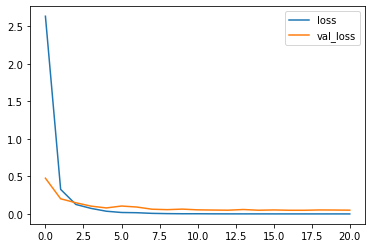

In [77]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

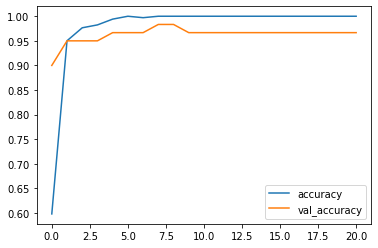

In [80]:
losses[['accuracy','val_accuracy']].plot()

In [81]:
### Test the model on test samples

In [86]:
url_test_0='C:\\Users\\saf167687\\Desktop\\Python_Learning\\Machine Learning Python\\98-Training\\archive\\Sign-Language-Digits-Datase\\test\\A0\\'
url_test_1='C:\\Users\\saf167687\\Desktop\\Python_Learning\\Machine Learning Python\\98-Training\\archive\\Sign-Language-Digits-Datase\\test\\A1\\'

In [87]:
test=[url_test_0+ url for url in os.listdir(url_test_0)]+[url_test_1+ url for url in os.listdir(url_test_1)]
X_test=np.array([(imread(images)/255).astype('float32') for images in test])

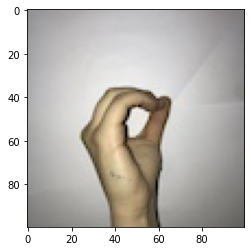

In [101]:
plt.imshow(X_test[1])

In [91]:
X_test=tf.constant(X_test)


In [92]:
predictions=model.predict(X_test)

In [102]:
predictions

array([[9.9999571e-01, 1.8247189e-06],
       [4.7146943e-01, 4.7627002e-01],
       [9.9384749e-01, 3.7323534e-03],
       [9.9995518e-01, 2.5831763e-05],
       [9.5961177e-01, 2.7116358e-02],
       [2.8506517e-03, 9.9809003e-01],
       [2.5105476e-04, 9.9987745e-01],
       [3.0357724e-06, 9.9999899e-01],
       [2.1629940e-05, 9.9999285e-01],
       [1.5211165e-02, 9.9069512e-01]], dtype=float32)

In [100]:
predictions>0.5

array([[ True, False],
       [False, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True]])

In [97]:
(predictions>0.5).astype('int')

array([[1, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [104]:
## Save the model

In [106]:
from tensorflow.keras.models import load_model
model.save('zero_one_prediction.h5')
